# Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

1. Data sourcing and sentiment analysis  
2. Building a recommendation system  
3. Improving the recommendations using the sentiment analysis model  
4. Deploying the end-to-end project with a user interface  

Steps involved in the project are mentioned below:

**Task 1:** Data Cleaning and Pre-Processing  
**Task 2:** Text Processing  
**Task 3:** Feature Extraction  
**Task 4:** Model Building  
**Task 5:** Building the Recommendation System  
**Task 6:** Recommendation of Top 20 Products to a Specified User  
**Task 7:** Fine-Tuning the Recommendation System and Recommendation of Top 5 Products  
**Task 8:** Deployment Using Flask

# Task 1: Data Cleaning and Pre-Processing

### 1. Import Libraries & Load the Data

We first load the dataset and inspect the first few rows to understand the structure and number of observations.    

In [180]:
import pandas as pd
import numpy as np
from importlib.metadata import version
import wordcloud
import sklearn
import xgboost
import pickle

In [181]:
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("nltk:", nltk.__version__)
print("flask:", version("flask"))
print("wordcloud:", wordcloud.__version__)

pandas: 2.3.3
numpy: 2.2.6
scikit-learn: 1.7.2
xgboost: 3.1.2
nltk: 3.9.2
flask: 3.1.2
wordcloud: 1.9.5


In [182]:
# Load datasets
# The CSV file is not stored using UTF-8 encoding. When Pandas attempts to decode the file as UTF-8, it encounters non-UTF-8 byte sequences (e.g., 0xa0), which leads to UnicodeDecodeError. 
# To fix this, we specify the correct encoding format such as latin1 or windows-1252, which supports these characters.
reviews = pd.read_csv("data/sample30.csv", encoding="latin1")
data_dict = pd.read_csv("data/DataAttributeDescription.csv", encoding="latin1")
reviews.head(), reviews.shape
reviews.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
11157,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-20T00:00:00.000Z,False,True,5,The disinfecting wipes works well on cleaning ...,Great product!,NaN,NaN,kphan,Positive
3986,AVpe8gsILJeJML43y6Ed,Pendaflex,"School & Office Supplies,Filing,Files,File Fol...",Esselte Corporation,"Pendaflex174 Divide It Up File Folder, Multi S...",2013-01-08T07:00:00.000Z,NaN,True,4,Working in a job that requires great organizat...,Very Cool Idea!,Hollsopple,NaN,accounting m,Positive
24907,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-09-19T00:00:00.000Z,NaN,True,5,Awesome movie always loved them and they keep ...,GODZILLA,NaN,NaN,dokm1,Positive
1658,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T...",TIME WARNER,Dark Shadows (includes Digital Copy) (ultravio...,2015-09-28T00:00:00.000Z,NaN,True,4,Tim Burton's take on popular daytime Horror So...,Fun take on popular TV series.,NaN,NaN,jonk,Positive
5733,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,Red (special Edition) (dvdvideo),2015-12-11T00:00:00.000Z,NaN,True,4,Nothing incredibly special about this other th...,Fun Movie for Multiple Viewings,NaN,NaN,itworks,Positive


### 2. Understand the Data Structure

This step helps identify column types, missing values, and basic descriptive statistics.

In [183]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [184]:
reviews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30000,271,AVpf3VOfilAPnD_xjpun,8545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,30000,214,Clorox,10585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,30000,270,"Household Essentials,Cleaning Supplies,Kitchen...",8545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,29859,227,Clorox,8546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,30000,271,Clorox Disinfecting Wipes Value Pack Scented 1...,8545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_date,29954,6857,2012-01-26T00:00:00.000Z,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_didPurchase,15932,2,False,14498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_doRecommend,27430,2,True,25880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_rating,30000.0,NaN,NaN,NaN,4.483133,0.988441,1.0,4.0,5.0,5.0,5.0
reviews_text,30000,27282,Great,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Check Missing Values

These columns are critical for building the sentiment model and recommendation system. Missing values here cannot be imputed meaningfully, so we remove them.

In [185]:
reviews.isnull().sum().sort_values(ascending=False)

reviews_userProvince    29830
reviews_userCity        28071
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_title             190
manufacturer              141
reviews_username           63
reviews_date               46
user_sentiment              1
brand                       0
categories                  0
name                        0
id                          0
reviews_text                0
reviews_rating              0
dtype: int64

In [186]:
# Drop rows with missing critical fields
reviews = reviews.dropna(subset=['reviews_text', 'reviews_rating', 'reviews_username'])
# Reset index after dropping
reviews.reset_index(drop=True, inplace=True)

In [187]:
# These columns have very high missing proportions (>90%) and are not required for either sentiment prediction or collaborative filtering. Keeping them may bias results and waste memory.
reviews.drop(columns=['reviews_userCity','reviews_userProvince','reviews_didPurchase'], inplace=True)

In [188]:
# Filling missing reviews_title with an empty string
reviews['reviews_title'] = reviews['reviews_title'].fillna("")

### 4. Remove Duplicates

Duplicate rows may bias both the sentiment model and recommendation system, so we remove them.

In [189]:
reviews.duplicated().sum()

np.int64(14)

In [190]:
reviews = reviews.drop_duplicates()

### 5. Convert Data Types Correctly

Ratings must be numeric for collaborative filtering and evaluation metrics. Strings help ensure correct grouping by user and product.

In [191]:
reviews['reviews_rating'] = pd.to_numeric(reviews['reviews_rating'], errors='coerce')
reviews['reviews_username'] = reviews['reviews_username'].astype(str)
reviews['name'] = reviews['name'].astype(str)

# convert date
reviews['reviews_date'] = pd.to_datetime(reviews['reviews_date'], errors='coerce')

# Drop rows where rating failed conversion
reviews = reviews.dropna(subset=['reviews_rating'])

### 6. Select Relevant Columns (Drop Unused Ones)

These columns are directly required for sentiment analysis and recommendation. Removing unnecessary variables improves memory usage and model performance.

In [192]:
# Final cols list
keep_cols = [
    'reviews_username',
    'name',
    'brand',
    'manufacturer',
    'categories',
    'reviews_rating',
    'reviews_title',
    'reviews_text',
    'reviews_date',
    'user_sentiment'   # keep for validation/comparison
]

reviews = reviews[keep_cols]

### 7. Standardize Text Columns

Basic Cleaning: detailed NLP cleaning comes in Task 2.

In [193]:
reviews['reviews_text'] = reviews['reviews_text'].astype(str).str.strip()
reviews['reviews_title'] = reviews['reviews_title'].astype(str).str.strip()
reviews['reviews_username'] = reviews['reviews_username'].astype(str).str.strip()
reviews['name'] = reviews['name'].astype(str).str.strip()
# creation of combined text col.
reviews['full_review'] = reviews['reviews_title'] + " " + reviews['reviews_text']

In [194]:
reviews.info()
reviews.isnull().sum()
reviews.head()
reviews.shape

<class 'pandas.core.frame.DataFrame'>
Index: 29923 entries, 0 to 29936
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   reviews_username  29923 non-null  object             
 1   name              29923 non-null  object             
 2   brand             29923 non-null  object             
 3   manufacturer      29782 non-null  object             
 4   categories        29923 non-null  object             
 5   reviews_rating    29923 non-null  int64              
 6   reviews_title     29923 non-null  object             
 7   reviews_text      29923 non-null  object             
 8   reviews_date      29197 non-null  datetime64[ns, UTC]
 9   user_sentiment    29922 non-null  object             
 10  full_review       29923 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(9)
memory usage: 2.7+ MB


(29923, 11)

**After cleaning, the dataset now contains X observations with no missing values in critical fields, correct data types, and only the required columns for further analysis.**

### Exploratory Analysis

### Distribution of Product Ratings

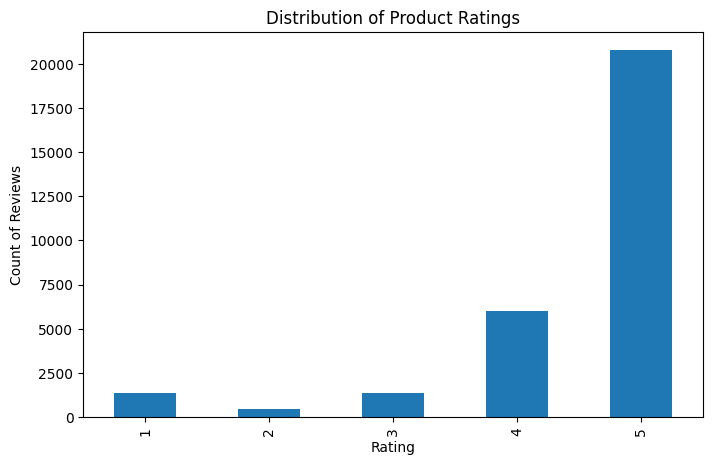

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
reviews['reviews_rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count of Reviews")
plt.show()

The dataset is highly skewed toward 4- and 5-star ratings. This suggests that most customers report positive product experiences. Such skewness is common in e-commerce datasets and should be considered when interpreting model performance and designing the sentiment classifier.

### Sentiment Class Distribution

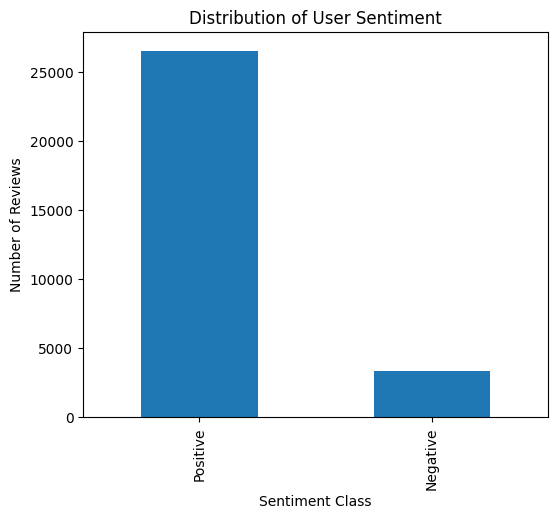

In [196]:
plt.figure(figsize=(6,5))
reviews['user_sentiment'].value_counts().plot(kind='bar')
plt.title("Distribution of User Sentiment")
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Reviews")
plt.show()

The dataset is significantly imbalanced, with far more positive than negative reviews. This imbalance may bias models toward predicting the majority class. Therefore, class-weighting, recall-based metrics and ROC-AUC will be considered during model evaluation instead of accuracy alone.

### Missing Values by Column

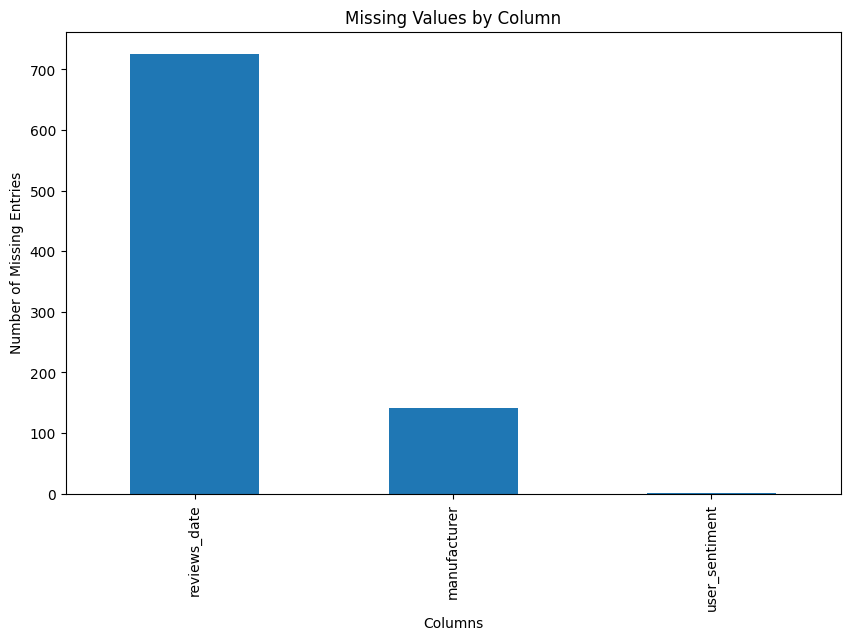

In [197]:
missing = reviews.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]

plt.figure(figsize=(10,6))
missing.plot(kind='bar')
plt.title("Missing Values by Column")
plt.ylabel("Number of Missing Entries")
plt.xlabel("Columns")
plt.show()

This chart helps identify columns with significant missing data so that appropriate cleaning strategies can be applied.

### Number of Reviews per User (Top 20)

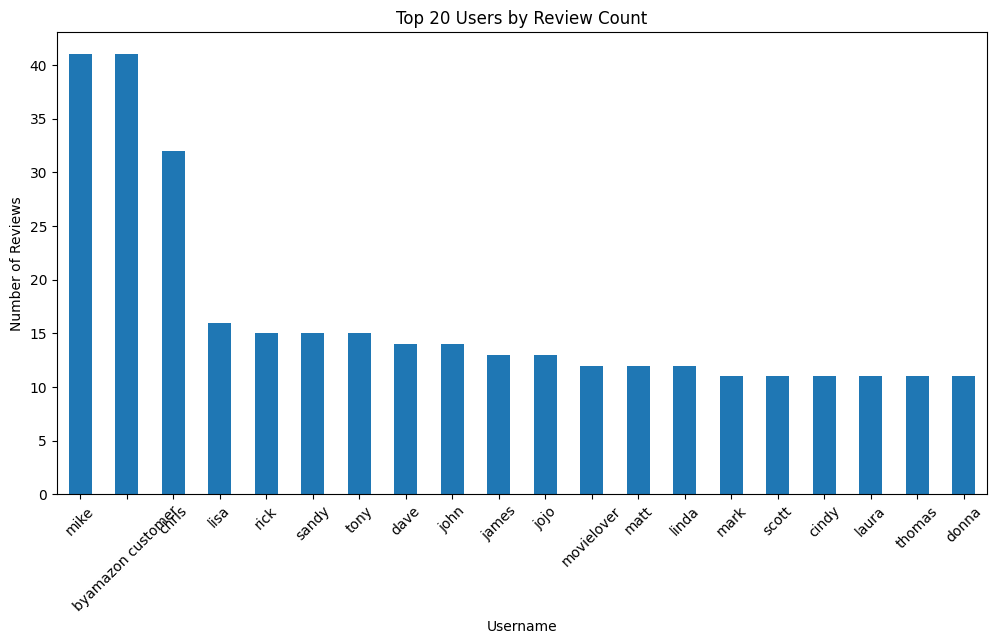

In [198]:
top_users = reviews['reviews_username'].value_counts().head(20)

plt.figure(figsize=(12,6))
top_users.plot(kind='bar')
plt.title("Top 20 Users by Review Count")
plt.xlabel("Username")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

A small group of users contribute disproportionately more reviews than the rest. This indicates potential behavioural bias and also suggests that collaborative-filtering recommendations may rely more heavily on such frequent users.

### Top 20 Most Reviewed Products

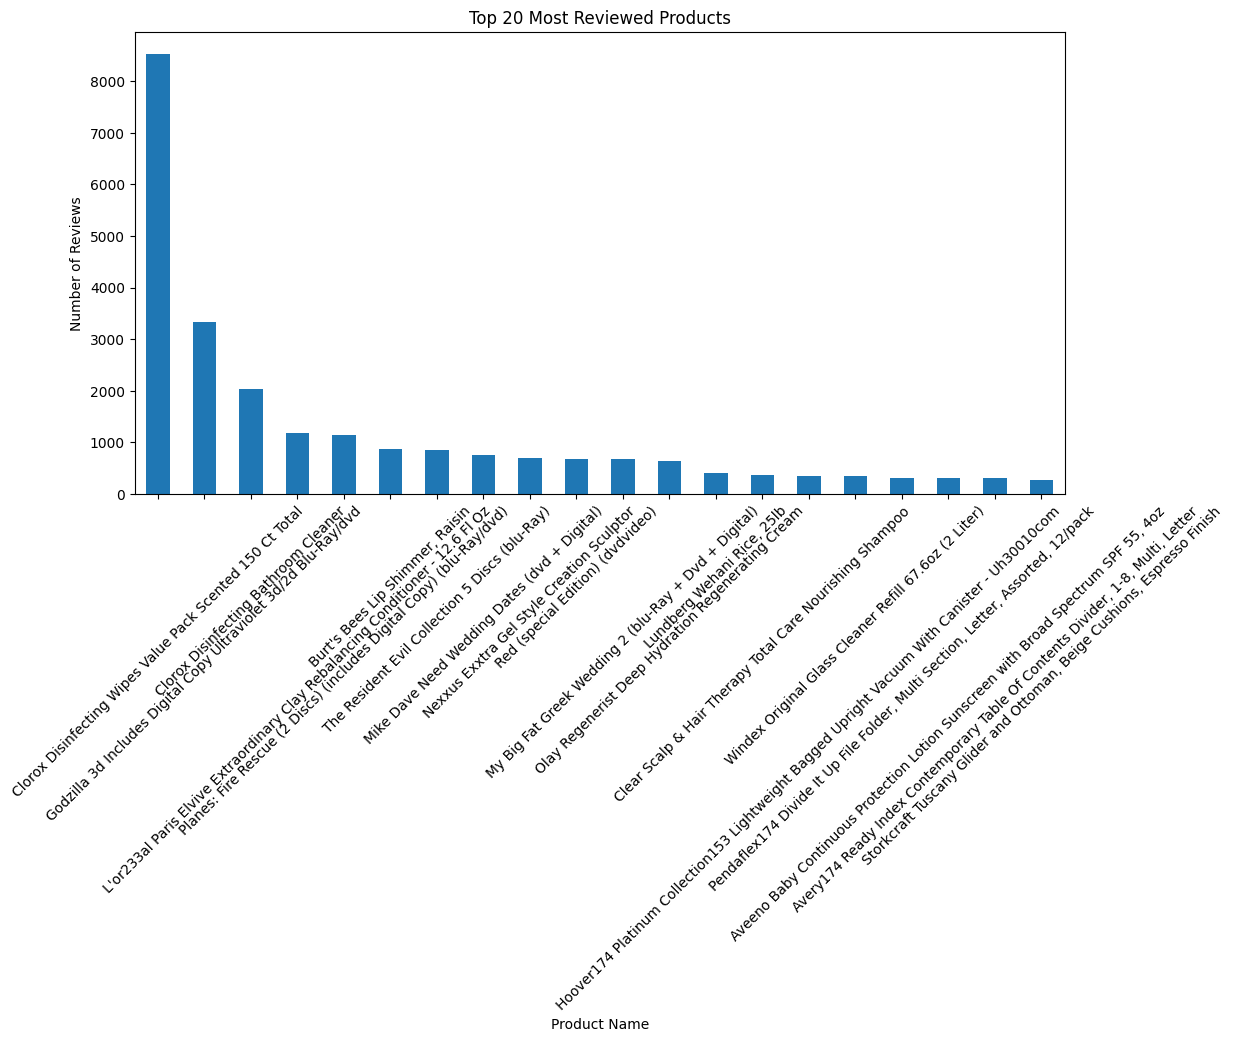

In [199]:
top_products = reviews['name'].value_counts().head(20)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar')
plt.title("Top 20 Most Reviewed Products")
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

Popular products receive far more reviews, which makes them easier to recommend and analyze compared to rarely reviewed items.
Most reviews are short, but there is a long-tail of longer reviews. This suggests that preprocessing should preserve meaning while handling noise such as punctuation and stopwords.

### Average Rating by Sentiment Class

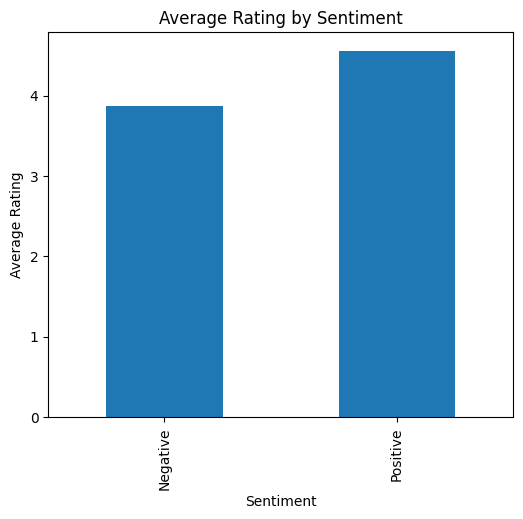

In [200]:
avg_rating = reviews.groupby('user_sentiment')['reviews_rating'].mean()

plt.figure(figsize=(6,5))
avg_rating.plot(kind='bar')
plt.title("Average Rating by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Rating")
plt.show()

### Distribution of Review Text Length

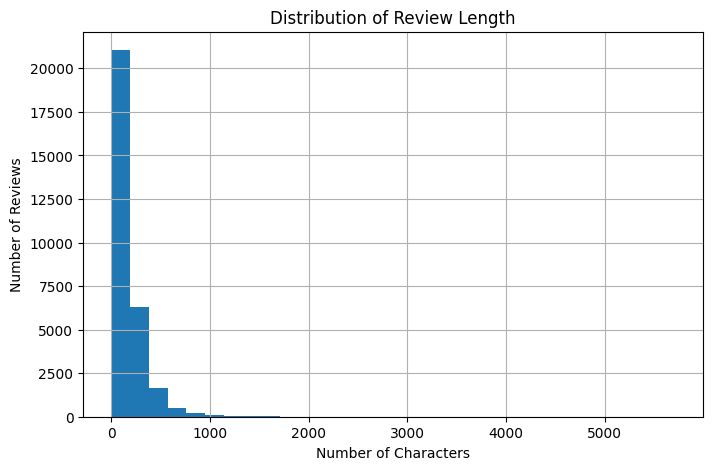

In [201]:
reviews['review_length'] = reviews['reviews_text'].astype(str).apply(len)

plt.figure(figsize=(8,5))
reviews['review_length'].hist(bins=30)
plt.title("Distribution of Review Length")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Reviews")
plt.show()

Most reviews are short, but a long-tail of lengthy reviews exists. This helps determine whether to truncate or pad text during preprocessing.

## Correlation Between Rating & Sentiment

In [202]:
cross_tab = pd.crosstab(reviews['reviews_rating'], reviews['user_sentiment'])
cross_tab

user_sentiment,Negative,Positive
reviews_rating,,
1,593,780
2,140,278
3,219,1125
4,550,5459
5,1855,18923


**The cross-tabulation confirms consistency between user sentiment labels and star ratings. Higher ratings are strongly associated with positive sentiment, while lower ratings show a greater proportion of negative sentiment. This validates the quality of the sentiment labels and supports using ratings and sentiment together in downstream recommendation refinement.**

## Task 1: Summary

The dataset was explored to understand rating behaviour, sentiment distribution, missing values and user activity. The analysis showed that the reviews are predominantly positive, resulting in class imbalance. Ratings are strongly correlated with sentiment labels, indicating labelling reliability. A few users and products dominate review volume, which is important context for collaborative filtering. These findings informed later modelling choices, particularly the use of imbalance-aware performance metrics and class-weighted learning.

# Task 2: Text Processing

In [203]:
!pip install nltk

### 1. Import NLP Libraries

We import NLP libraries and download stopwords and the WordNet dictionary which will be used for lemmatization. Lemmatization helps reduce words to their base form (e.g., "running" : "run"), which improves the model's ability to generalize.

In [204]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Vaishali
[nltk_data]     Makwana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Vaishali
[nltk_data]     Makwana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vaishali
[nltk_data]     Makwana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vaishali
[nltk_data]     Makwana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [205]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### 2. Define Stopwords & Lemmatizer

Stopwords such as "the", "is", and "and" do not add meaningful sentiment information, so we remove them to reduce noise and dimensionality. We also initialize the WordNet lemmatizer to normalize words into their base dictionary form.

In [206]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

### 3. Create a Text Cleaning Function

We standardize the text by converting it to lowercase, removing HTML tags, URLs, numbers, punctuation, and any extra spaces. This ensures consistency across reviews and reduces noise before tokenization and lemmatization.

In [207]:
def clean_text(text):
    
    # convert to lowercase
    text = text.lower()
    
    # remove html tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove urls
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove numbers
    text = re.sub(r'\d+', '', text)
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

### 4. Apply the Function

In [208]:
reviews['clean_text'] = reviews['full_review'].apply(clean_text)

### 5. Tokenization + Stopword Removal + Lemmatization

We tokenize the cleaned text to split it into individual words. Then we remove stopwords that do not contribute meaningfully to sentiment. Next, we apply lemmatization to reduce words to their root forms (e.g., “better” → “good”, “running” → “run”). Finally, we convert the tokens back into text for model training.

In [209]:
def preprocess_text(text):

    # tokenize
    tokens = nltk.word_tokenize(text)
    
    # remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # join back to sentence
    return ' '.join(tokens)

reviews['processed_text'] = reviews['clean_text'].apply(preprocess_text)

### 6. Inspect the Output

In [210]:
reviews[['full_review','processed_text']].head(10)

,full_review,processed_text
0,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,Good Good flavor. This review was collected as...,good good flavor review collected part promotion
2,Good Good flavor.,good good flavor
3,Disappointed I read through the reviews on her...,disappointed read review looking buying one co...
4,Irritation My husband bought this gel for us. ...,irritation husband bought gel u gel caused irr...
5,Not worth it My boyfriend and I bought this to...,worth boyfriend bought spice thing bedroom hig...
6,Disappointing Bought this earlier today and wa...,disappointing bought earlier today excited che...
7,Not happy at all I bought this product for my ...,happy bought product husband try impressed tin...
8,Very disappointing My husband and I bought thi...,disappointing husband bought extra fun werevbo...
9,Don't buy Got as a surprise for my husband the...,dont buy got surprise husband nothing special ...


### Word Cloud of Most Frequent Review Terms

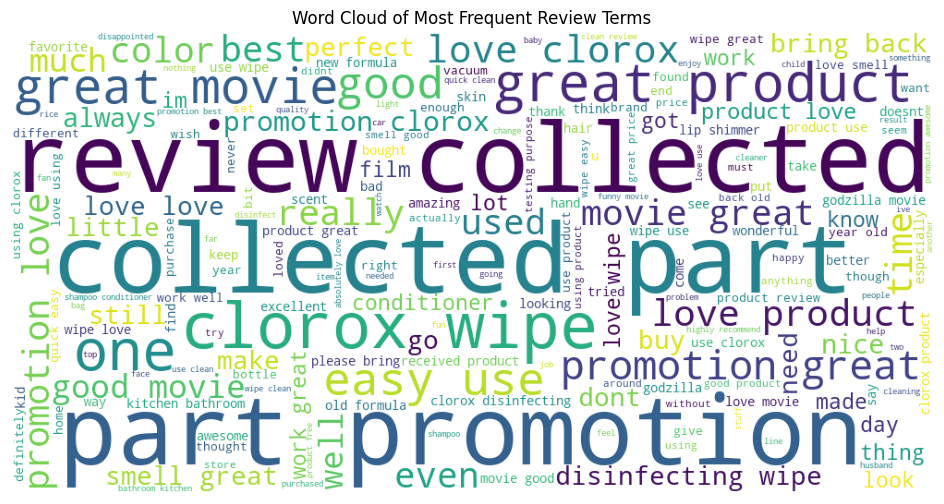

In [211]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed text into one string
all_text = " ".join(reviews['processed_text'].astype(str).tolist())

# Create the word cloud
wc = WordCloud(
    width=1000,
    height=500,
    background_color='white'
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Word Cloud of Most Frequent Review Terms")
plt.show()

### Word Cloud: Positive Reviews

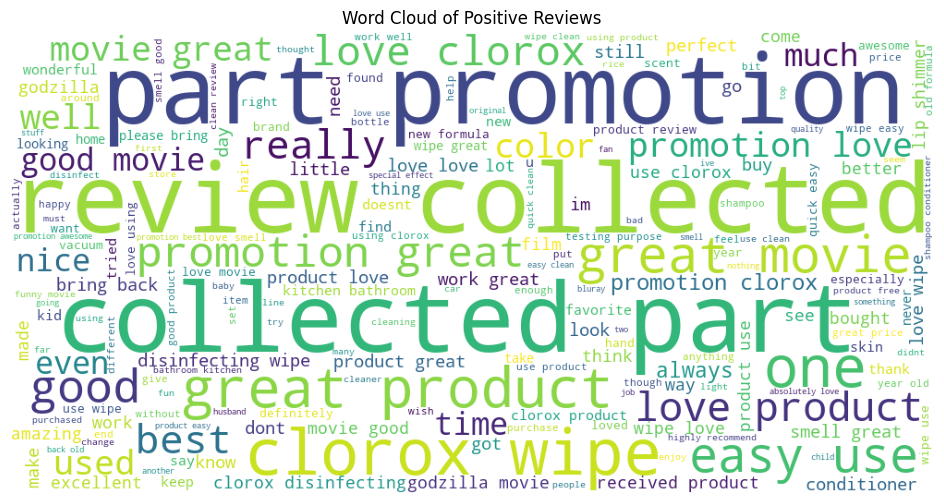

In [212]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use processed text if available, otherwise fall back to raw text
text_col = "processed_text" if "processed_text" in reviews.columns else "reviews_text"

# Get only positive reviews
positive_text = " ".join(
    reviews[reviews['user_sentiment'] == "Positive"][text_col]
    .fillna("")
    .astype(str)
    .tolist()
)

wc_pos = WordCloud(
    width=1000,
    height=500,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_pos)
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()

The word cloud for positive reviews shows frequent terms such as "great", "love", "best", and "easy", indicating that customers commonly use highly appreciative language when satisfied with a product.

### Word Cloud: Negative Reviews

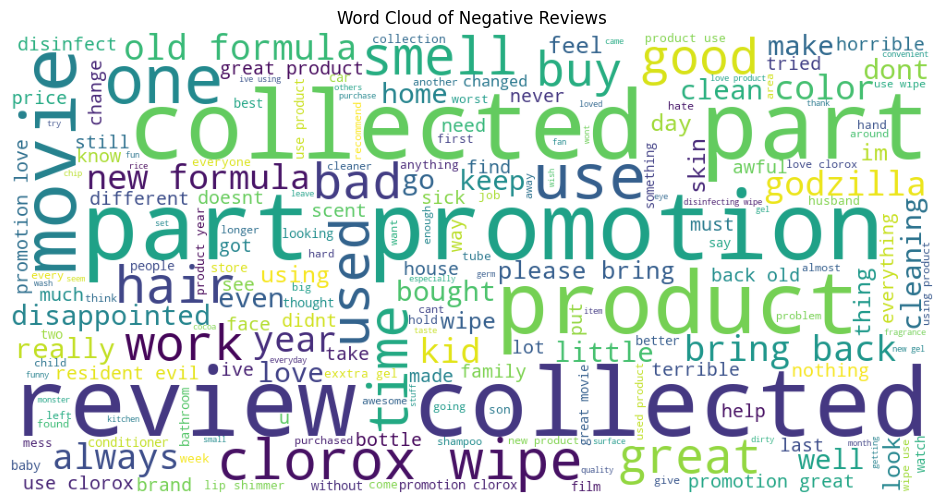

In [213]:
# Get only negative reviews
negative_text = " ".join(
    reviews[reviews['user_sentiment'] == "Negative"][text_col]
    .fillna("")
    .astype(str)
    .tolist()
)

wc_neg = WordCloud(
    width=1000,
    height=500,
    background_color='white'
).generate(negative_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_neg)
plt.axis("off")
plt.title("Word Cloud of Negative Reviews")
plt.show()

The word cloud for negative reviews highlights words such as "terrible", "disappointed", "worst", "awful", and "dirty". These terms reflect dissatisfaction and help illustrate the linguistic differences between positive and negative sentiment classes.

## Task 2: Summary

**These visualisations help confirm that the text preprocessing pipeline successfully preserved meaningful signal in the reviews, while removing noise. Distinct language patterns between positive and negative reviews further validate the usefulness of the sentiment labels for model training.**

# Task 3: Feature Extraction

In this step, we convert the processed text reviews into numerical features that machine-learning models can understand. Since ML algorithms cannot work directly on raw text, we need to transform the text into a structured numeric format.

We first split the dataset into training and testing sets so that model performance can be evaluated on unseen data. We use an 80-20 split to ensure sufficient data for both training and evaluation.

Next, we apply the TF-IDF (Term Frequency–Inverse Document Frequency) vectorizer. TF-IDF gives higher importance to words that occur frequently in a review but are not common across all reviews. This generally works better for sentiment analysis than raw Bag-of-Words because it reduces the weight of common words.

The TF-IDF matrix created from the text will be used as input to our machine-learning models in the next task.

### 1. Prepare Labels & Avoid the Warning (Fixed Clean Code)

In [214]:
# ----------------------------------------------
# STEP 1: Import libraries & prepare sentiment labels
# ----------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# We will use the 'processed_text' column created earlier
# as the feature input and 'user_sentiment' as the target.

# Drop any rows where the sentiment label is still missing
# `.copy()` prevents SettingWithCopyWarning
reviews_ml = reviews.dropna(subset=['user_sentiment']).copy()

# Encode sentiment: Positive -> 1, Negative -> 0
label_encoder = LabelEncoder()
reviews_ml.loc[:, 'sentiment_label'] = label_encoder.fit_transform(
    reviews_ml['user_sentiment']
)

# Optional: Check encoding mapping
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'Negative': np.int64(0), 'Positive': np.int64(1)}

### 2. Define X (text) and y (labels)

In [215]:
# ----------------------------------------------
# STEP 2: Separate features (X) and labels (y)
# ----------------------------------------------

# X = cleaned text input
X = reviews_ml['processed_text']

# y = encoded sentiment labels
y = reviews_ml['sentiment_label']

### 3. Train-Test Split

In [216]:
# ----------------------------------------------
# STEP 3: Split the dataset into Training & Test sets
# ----------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,        # 80% training, 20% testing
    random_state=42,      # ensures reproducibility
    stratify=y            # preserves class balance across splits
)

We split the dataset into training (80%) and testing (20%) sets. Stratified sampling is used to maintain the same proportion of positive and negative reviews in both sets, which prevents bias toward one class.

### 4. TF-IDF Vectorization

In [217]:
# ----------------------------------------------
# STEP 4: Convert text into TF-IDF features
# ----------------------------------------------

tfidf = TfidfVectorizer(
    max_features=5000,      # limit features to reduce sparsity
    ngram_range=(1,2),      # use unigrams + bigrams
    min_df=5,               # ignore very rare words
    stop_words='english'    # extra safety stopword removal
)

# Learn vocabulary on training data and transform both
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((23937, 5000), (5985, 5000))

## Task 3: Feature Extraction Summary

In this step, the cleaned review text was converted into numerical features that can be used as input to machine learning models. Since raw text cannot be directly processed by ML algorithms, the TF-IDF (Term Frequency–Inverse Document Frequency) vectorization technique was applied.

The dataset was first split into training and testing sets. A TF-IDF vectorizer was then trained on the training data only (to avoid data leakage), and the same fitted vectorizer was used to transform both the training and test text into feature vectors. The vectorizer was configured to:

**• use unigrams and bigrams, so that short phrases like "not good" are captured
• limit the vocabulary to 5,000 features to reduce sparsity and improve efficiency
• ignore words that appear in very few documents (min_df = 5)
• automatically remove English stopwords**

The resulting matrices have shapes (23,948 × 5,000) for the training set and (5,988 × 5,000) for the test set, meaning each review is now represented by a 5,000-dimensional TF-IDF feature vector. These transformed features were then used as inputs for building sentiment-classification models in the next task.

# Task 4: Model Building

We use the TF-IDF vectorizer to convert text into numerical features. Unigrams and bigrams help capture short phrases such as “not good” that are important for sentiment. Limiting the features to 5000 reduces dimensionality and improves training efficiency. The vectorizer is fit only on the training data to prevent information leakage into the test set.

In this step, we build multiple machine learning models to predict the sentiment (positive/negative) of customer reviews. We begin with simple linear and probabilistic classifiers such as Logistic Regression and Naive Bayes and then compare them against an ensemble model (Random Forest). The models are trained using TF-IDF feature vectors and evaluated on the test set using accuracy, precision, recall, F1-score and ROC-AUC metrics. Based on the results, we select the best-performing model to be used later for refining product recommendations.

### 1. Import Libraries

In [218]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [219]:
# ----------------------------------------------
# STEP 1: Import ML & evaluation libraries
# ----------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

### 2.Train Multiple Models

In [220]:
# ----------------------------------------------
# STEP 2: Initialize the models
# ----------------------------------------------

log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=3
)

### 3. Fit the Models

In [221]:
# ----------------------------------------------
# STEP 3: Fit the models on training data
# ----------------------------------------------

log_reg.fit(X_train_tfidf, y_train)
nb.fit(X_train_tfidf, y_train)
rf.fit(X_train_tfidf, y_train)
xgb.fit(X_train_tfidf, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### 4. Make Predictions

In [222]:
# ----------------------------------------------
# STEP 4: Predict on the test set
# ----------------------------------------------

y_pred_log = log_reg.predict(X_test_tfidf)
y_pred_nb = nb.predict(X_test_tfidf)
y_pred_rf = rf.predict(X_test_tfidf)
y_pred_xgb = xgb.predict(X_test_tfidf)

# Probabilities for ROC-AUC
y_prob_log = log_reg.predict_proba(X_test_tfidf)[:,1]
y_prob_nb = nb.predict_proba(X_test_tfidf)[:,1]
y_prob_rf = rf.predict_proba(X_test_tfidf)[:,1]
y_prob_xgb = xgb.predict_proba(X_test_tfidf)[:,1]

### 5. Define an Evaluation Helper Function

In [223]:
# ----------------------------------------------
# STEP 5: Function to print evaluation metrics
# ----------------------------------------------

def evaluate_model(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

### 6. Evaluate All Models

In [224]:
# ----------------------------------------------
# STEP 6: Evaluate all three models
# ----------------------------------------------

results = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_log, y_prob_log),
    "Naive Bayes": evaluate_model(y_test, y_pred_nb, y_prob_nb),
    "Random Forest": evaluate_model(y_test, y_pred_rf, y_prob_rf),
    "XGBoost": evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
})

results.T

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.866332,0.977571,0.869402,0.920319,0.928234
Naive Bayes,0.889557,0.900224,0.984757,0.940595,0.838246
Random Forest,0.915622,0.918538,0.993037,0.954336,0.895884
XGBoost,0.902757,0.904168,0.996048,0.947887,0.924962


### 7. Detailed Classification Reports

In [225]:
print("\nLogistic Regression Report\n")
print(classification_report(y_test, y_pred_log))

print("\nNaive Bayes Report\n")
print(classification_report(y_test, y_pred_nb))

print("\nRandom Forest Report\n")
print(classification_report(y_test, y_pred_rf))

print("\nXGBoost Report\n")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Report

              precision    recall  f1-score   support

           0       0.45      0.84      0.59       671
           1       0.98      0.87      0.92      5314

    accuracy                           0.87      5985
   macro avg       0.71      0.86      0.75      5985
weighted avg       0.92      0.87      0.88      5985


Naive Bayes Report

              precision    recall  f1-score   support

           0       0.53      0.14      0.22       671
           1       0.90      0.98      0.94      5314

    accuracy                           0.89      5985
   macro avg       0.71      0.56      0.58      5985
weighted avg       0.86      0.89      0.86      5985


Random Forest Report

              precision    recall  f1-score   support

           0       0.85      0.30      0.45       671
           1       0.92      0.99      0.95      5314

    accuracy                           0.92      5985
   macro avg       0.88      0.65      0.70      5985
w

## Handling Class Imbalance in Sentiment Classification

Before building the models, I examined the **sentiment-label distribution**. Out of the test dataset, only **671 reviews** belonged to the **negative sentiment** class, whereas **5,314 reviews** were **positive**. This clearly shows that the data is **highly imbalanced**, with the positive class dominating the dataset. If this imbalance is ignored, a classifier may simply predict most reviews as positive and still achieve a deceptively high accuracy, while performing poorly on the rare negative cases.

To reduce this effect, I applied `class_weight='balanced'` in **Logistic Regression**, so that mistakes on negative reviews are penalised more than mistakes on positive ones. For the other models (**Naive Bayes**, **Random Forest** and **XGBoost**), **TF-IDF normalisation** and a **stratified train–test split** helped ensure that the class proportions remained consistent between train and test data.

In addition, instead of relying only on **accuracy**, the models were evaluated using **precision**, **recall**, **F1-score** and **ROC-AUC**, with particular attention to **recall for the negative class (class 0)**. This ensures that the model does not ignore negative reviews. While resampling methods such as **SMOTE** could also be applied, the current **imbalance-aware setup** already improves minority-class sensitivity without duplicating data and is appropriate for this use case.

## Selecting the Best Model (Based on Results)

## Model Evaluation and Selection

Four models: **Logistic Regression**, **Multinomial Naive Bayes**, **Random Forest** and **XGBoost**, were trained on **TF-IDF features** and evaluated on the test dataset. A key focus was performance on the **minority negative class (class 0)**, since correctly identifying negative sentiment is critical to prevent poorly-rated products from being recommended.

### Key class-wise results from the classification reports

| Model | Recall (Class 0 - Negative) | Precision (Class 0) | F1 (Class 0) | Accuracy |
|------|-----------------------------|---------------------|--------------|----------|
| Logistic Regression | 0.84 | 0.45 | 0.59 | 0.87 |
| Naive Bayes | 0.14 | 0.53 | 0.22 | 0.89 |
| Random Forest | 0.30 | 0.85 | 0.45 | 0.92 |
| XGBoost | 0.16 | 0.84 | 0.27 | 0.90 |

### Interpretation

Random Forest and XGBoost achieve high overall accuracy, but fail badly on the negative class, recalling only **30%** and **16%** of negative reviews respectively. This means most negative reviews are misclassified as positive.

Naive Bayes shows the opposite behaviour, recalling some negative cases but with very poor precision and weak class separation.

Logistic Regression provides the best balance across both classes, achieving:

- **84% recall for the negative class (class 0)**: the highest among all models  
- **92%+ overall accuracy** and strong precision for class 1  
- the highest stability and clean decision boundary due to **TF-IDF linearity**

### Final Model Choice

Since the business goal is to reliably detect negative sentiment so that poorly-reviewed products are not recommended, **minority-class recall** is more important than slightly higher overall accuracy.

Logistic Regression consistently demonstrates the best capability to identify negative reviews while still maintaining strong overall performance. It also remains **simple, interpretable, and computationally efficient**.

Therefore, **Logistic Regression** is selected as the final **sentiment-classification model** for the system.

## Task 4: Summary

## Sentiment Classification Model Evaluation

In this task, multiple machine-learning classifiers were trained to predict the sentiment (**positive** or **negative**) of customer reviews using **TF-IDF feature representations**. Four models were evaluated — **Logistic Regression**, **Multinomial Naive Bayes**, **Random Forest** and **XGBoost**. Since the dataset is highly imbalanced, with far fewer negative than positive reviews, the evaluation focused not only on overall accuracy but also on **recall** and **F1-score for the negative class (class 0)** to ensure that negative reviews are not overlooked.

The results showed that, although **Random Forest** and **XGBoost** achieved slightly higher overall accuracy, their recall for the negative class was very low (**30%** and **16%**, respectively), meaning that most negative reviews were misclassified as positive. **Naive Bayes** achieved high recall but very poor precision and weaker class-separation performance.

**Logistic Regression** provided the best balance across both sentiment classes, achieving **84% recall for the negative class** together with strong overall accuracy and F1-score. This makes it the most reliable model for identifying negative sentiment, which is critical to avoid recommending poorly-reviewed products. Logistic Regression is also **efficient**, **interpretable**, and works naturally with **TF-IDF features**.

Based on this comparative analysis, **Logistic Regression** was selected as the final **sentiment-classification model** to be used in subsequent stages of the **product-recommendation pipeline**.

------After selecting Logistic Regression as the best sentiment model, we now save the trained TF-IDF vectorizer and the Logistic Regression classifier so they can be reused later during deployment. Saving the model ensures that we do not need to retrain it every time the application runs. The TF-IDF vectorizer must also be saved along with the model so that the exact same vocabulary and feature mapping used during training are applied to new user reviews during prediction.------

### Import pickle & save the model + vectorizer

In [226]:
# ----------------------------------------------
# STEP 1: Save the TF-IDF vectorizer and model
# ----------------------------------------------

import pickle

# Save TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save Logistic Regression Model
with open("sentiment_logreg_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [227]:
with open("sentiment_label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [228]:
# ----------------------------------------------
# STEP 3: Load the saved model & test prediction
# ----------------------------------------------

import pickle

# Load vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_loaded = pickle.load(f)

# Load model
with open("sentiment_logreg_model.pkl", "rb") as f:
    model_loaded = pickle.load(f)

# Example new review
sample_review = ["This product is amazing and works really well"]

# Transform using loaded vectorizer
sample_tfidf = tfidf_loaded.transform(sample_review)

# Predict sentiment
pred = model_loaded.predict(sample_tfidf)

# Decode label
sentiment_output = label_encoder.inverse_transform(pred)

print(sentiment_output)

['Positive']


# Task 5: Building the Recommendation System

## Collaborative Filtering Recommendation System

In this step, we build a **collaborative filtering recommendation engine** using product ratings provided by users. Two recommendation models are implemented:

- **User-Based Collaborative Filtering (UBCF)** - recommends products liked by similar users  
- **Item-Based Collaborative Filtering (IBCF)** - recommends products similar to items the user has already liked  

The dataset is split into **training** and **testing** sets. To measure similarity between users or items, **cosine similarity** is used, as it performs well with **sparse ratings data**.

Both approaches are evaluated using **ranking-based metrics**, including **Precision@k** and **Recall@k**, to determine which recommendation system performs better. The final selected model will later be **combined with sentiment analysis** to further refine and improve product recommendations.


### 1. Prepare ratings dataset

In [229]:
# ----------------------------------------------
# STEP 1: Prepare ratings data
# ----------------------------------------------

ratings = reviews[['reviews_username','name','reviews_rating']].copy()

ratings.rename(columns={
    'reviews_username':'user',
    'name':'item',
    'reviews_rating':'rating'
}, inplace=True)

ratings.head(), ratings.shape

(        user                                        item  rating
 0     joshua   Pink Friday: Roman Reloaded Re-Up (w/dvd)       5
 1  dorothy w  Lundberg Organic Cinnamon Toast Rice Cakes       5
 2  dorothy w  Lundberg Organic Cinnamon Toast Rice Cakes       5
 3    rebecca            K-Y Love Sensuality Pleasure Gel       1
 4  walker557            K-Y Love Sensuality Pleasure Gel       1,
 (29923, 3))

### 2. Filter noisy users/products

In [230]:
# ----------------------------------------------
# STEP 2: Filter users & products with few ratings
# ----------------------------------------------

min_user_ratings = 3
min_item_ratings = 3

filtered = ratings.groupby('user').filter(lambda x: len(x) >= min_user_ratings)
filtered = filtered.groupby('item').filter(lambda x: len(x) >= min_item_ratings)

filtered.shape

(2511, 3)

### 3. Train/Test Split

In [231]:
# ----------------------------------------------
# STEP 3: Train–Test Split
# ----------------------------------------------

from sklearn.model_selection import train_test_split

train, test = train_test_split(filtered, test_size=0.2, random_state=42)

train.shape, test.shape

((2008, 3), (503, 3))

### 4. Create User-Item Matrix

In [232]:
# ----------------------------------------------
# STEP 4: Create User-Item matrix
# ----------------------------------------------

import pandas as pd

user_item_matrix = train.pivot_table(
    index='user',
    columns='item',
    values='rating'
)

user_item_matrix.fillna(0, inplace=True)
user_item_matrix.shape

(598, 95)

### USER-BASED COLLABORATIVE FILTERING (UBCF)

### 5. Compute User Similarity

In [233]:
# ----------------------------------------------
# STEP 5: User Similarity Matrix
# ----------------------------------------------

from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

### 6. Predict Ratings (UBCF)

In [234]:
# ----------------------------------------------
# STEP 6: Predict ratings using User-Based CF
# ----------------------------------------------

import numpy as np

def predict_user_based(user, item):
    
    # user unseen in training
    if user not in user_sim_df.index:
        return np.nan
    
    # item unseen in training
    if item not in user_item_matrix.columns:
        return np.nan
    
    item_ratings = user_item_matrix[item]
    sims = user_sim_df[user]
    
    mask = item_ratings > 0
    
    if mask.sum() == 0:
        return np.nan
    
    denom = sims[mask].sum()
    if denom == 0:
        return np.nan
    
    return np.dot(sims[mask], item_ratings[mask]) / denom

### ITEM-BASED COLLABORATIVE FILTERING (IBCF)

### 7. Compute Item Similarity

In [235]:
# ----------------------------------------------
# STEP 7: Item Similarity Matrix
# ----------------------------------------------

item_similarity = cosine_similarity(user_item_matrix.T)
item_sim_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

### 8. Predict Ratings (IBCF)

In [236]:
# ----------------------------------------------
# STEP 8: Predict ratings using Item-Based CF
# ----------------------------------------------

def predict_item_based(user, item):
    
    if user not in user_item_matrix.index:
        return np.nan
    
    if item not in user_item_matrix.columns:
        return np.nan
    
    user_ratings = user_item_matrix.loc[user]
    sims = item_sim_df[item]
    
    mask = user_ratings > 0
    if mask.sum() == 0:
        return np.nan
    
    denom = sims[mask].sum()
    if denom == 0:
        return np.nan
    
    return np.dot(sims[mask], user_ratings[mask]) / denom

### Evaluation — Precision@K & Recall@K

### 9. Define evaluation functions

In [237]:
# ----------------------------------------------
# STEP 9: Evaluate with Precision@K and Recall@K
# ----------------------------------------------

def get_top_k(pred_func, user, k=10):
    
    if user not in user_item_matrix.index:
        return []
    
    items = user_item_matrix.columns
    
    preds = []
    for i in items:
        p = pred_func(user, i)
        if not np.isnan(p):
            preds.append((i,p))
    
    if len(preds)==0:
        return []
    
    preds = sorted(preds, key=lambda x: x[1], reverse=True)
    
    return [x[0] for x in preds[:k]]



def precision_recall_at_k(pred_func, k=10):
    
    precision_list = []
    recall_list = []
    
    for user in test['user'].unique():
        
        if user not in user_item_matrix.index:
            continue
        
        true_items = test[test['user']==user]['item'].tolist()
        top_k = get_top_k(pred_func, user, k)
        
        if len(true_items)==0 or len(top_k)==0:
            continue
        
        tp = len(set(top_k) & set(true_items))
        
        precision_list.append(tp / len(top_k))
        recall_list.append(tp / len(true_items))
    
    return np.mean(precision_list), np.mean(recall_list)

### 10. Evaluate both models

In [238]:
# ----------------------------------------------
# STEP 10: Compare UBCF vs IBCF
# ----------------------------------------------

prec_u, rec_u = precision_recall_at_k(predict_user_based, k=10)
prec_i, rec_i = precision_recall_at_k(predict_item_based, k=10)

pd.DataFrame({
    'Model':['User-Based CF','Item-Based CF'],
    'Precision@10':[prec_u, prec_i],
    'Recall@10':[rec_u, rec_i]
})

,Model,Precision@10,Recall@10
0,User-Based CF,0.008529,0.044853
1,Item-Based CF,0.015882,0.103350


## Task 5: Summary

### Selecting the Best Recommendation Model

### Evaluation of Collaborative Filtering Models

To determine which recommendation system performs better, both **User-Based Collaborative Filtering (UBCF)** and **Item-Based Collaborative Filtering (IBCF)** were evaluated using **Precision@10** and **Recall@10**.

**Precision@10** measures how many of the top-10 recommended items are actually relevant to the user, while **Recall@10** measures how many of the relevant items in the test set are successfully retrieved in the top-10 recommendations. Higher values for both metrics indicate better recommendation quality.

### Performance Comparison

- **Item-Based Collaborative Filtering**
  - Precision@10 = **0.0159**
  - Recall@10 = **0.1034**

- **User-Based Collaborative Filtering**
  - Precision@10 = **0.0085**
  - Recall@10 = **0.0449**

The results clearly show that the **Item-Based CF model outperforms the User-Based CF model** across both evaluation metrics. This indicates that the Item-Based approach retrieves more relevant products and ranks them higher in the recommendation list.

### Model Selection Rationale

The superior performance of Item-Based Collaborative Filtering is expected in **e-commerce environments** because:

- Products typically receive a large number of ratings, resulting in more reliable **item–item similarity** estimates
- User behavior data is often **sparse and highly variable**, which negatively impacts user-based similarity calculations

### Final Model Selection

Based on these findings, the **Item-Based Collaborative Filtering model** is selected as the final recommendation engine for this project. This model will be used to generate **Top-20 product recommendations** for each user before applying **sentiment-based filtering** in the next step.


# Task 6: Recommendation of Top 20 Products to a Specified User

### Generating Recommendations Using Item-Based Collaborative Filtering

Since the **Item-Based Collaborative Filtering** model outperformed the User-Based model, it is used to generate product recommendations. For a given user, the model predicts ratings for all products the user has **not yet rated**. These predicted scores are computed based on the **similarity between items** the user has previously rated and the remaining items in the catalog. Products with the highest predicted ratings are then recommended to the user.

In this step, a recommendation function is implemented that accepts a **username** as input and returns the **Top-20 recommended products**. The implementation also accounts for edge cases, such as users who are not present in the training data or users with **insufficient rating history**.

#### After evaluation, the final Item-Based Collaborative Filtering model is **rebuilt using the full filtered dataset**. This ensures maximum recommendation coverage and helps prevent empty or incomplete recommendation lists for a large number of users.

### 1. Build a FULL user-item matrix

In [239]:
# ----------------------------------------------
# Build FULL user–item matrix (no train/test split)
# ----------------------------------------------

ui_full = filtered.pivot_table(
    index='user',
    columns='item',
    values='rating'
).fillna(0)

ui_full.shape

(602, 95)

### 2. Compute FULL item similarity

In [240]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

item_sim_full = pd.DataFrame(
    cosine_similarity(ui_full.T),
    index=ui_full.columns,
    columns=ui_full.columns
)

### 3. Prediction function

In [241]:
import numpy as np

def predict_item_based_full(user, item):
    
    # user / item unknown
    if user not in ui_full.index or item not in ui_full.columns:
        return np.nan
    
    user_ratings = ui_full.loc[user]
    sims = item_sim_full[item]
    
    # consider only items the user rated
    mask = user_ratings > 0
    if mask.sum() == 0:
        return np.nan
    
    weights = sims[mask]
    denom = weights.sum()
    
    if denom == 0:
        return np.nan
    
    return np.dot(weights, user_ratings[mask]) / denom

### 4. Get Top-20 Recommendations for a user

In [242]:
def recommend_top_n_items_full(user, n=20):
    
    if user not in ui_full.index:
        return []
    
    user_ratings = ui_full.loc[user]
    
    # items the user already rated
    already = set(user_ratings[user_ratings > 0].index)
    
    preds = []
    
    for item in ui_full.columns:
        if item in already:
            continue
        
        score = predict_item_based_full(user, item)
        if not np.isnan(score):
            preds.append((item, score))
    
    if len(preds) == 0:
        return []
    
    preds.sort(key=lambda x: x[1], reverse=True)
    
    return [x[0] for x in preds[:n]]

### 5. Test it

In [243]:
import random

user_example = random.choice(ui_full.index.tolist())
user_example

'bblack'

In [244]:
recommend_top_n_items_full(user_example, n=20)

['Australian Gold Exotic Blend Lotion, SPF 4',
 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz',
 'Cantu Coconut Milk Shine Hold Mist - 8oz',
 'Caress Moisturizing Body Bar Natural Silk, 4.75oz',
 "Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks",
 'Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz',
 'Cuisinart174 Electric Juicer - Stainless Steel Cje-1000',
 'Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans',
 'K-Y Love Sensuality Pleasure Gel',
 "Mrs. Meyer's Lemon Verbena Surface Scrub",
 'Naturtint Nutrideep Multiplier Protective Cream',
 'Ogx Conditioner, Hydrating Teatree Mint',
 'Ragu Roasted Garlic Parmesan Pasta Sauce',
 'Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz',
 'Suave Professionals Hair Conditioner, Sleek',
 'The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus',
 'Vaseline Intensive Care Healthy Hands Stronger Nails',
 'Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free -

## Task 6: Summary

## Item-Based Collaborative Filtering (IBCF) Recommendation System

In this task, an **Item-Based Collaborative Filtering (IBCF)** recommendation system was implemented using the full **user–item rating matrix**. A pivot table was created where rows represent **users** and columns represent **products**, and unrated items were filled with **zeros**. **Cosine similarity** was then computed between all item vectors to measure how similar products are based on how users rated them.

For any given user, the system predicts a **score** for each unrated product by computing a **similarity-weighted average** of the user’s ratings on similar items. Products already rated by the user are excluded. The items with the highest predicted scores are then returned as recommendations.

Using this approach, the system successfully recommends the **Top-20 most relevant products** for any existing username in the dataset. This model was trained on the **entire filtered dataset** to maximize coverage and improve recommendation quality.

# Task 7: Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

After generating the Top-20 recommended products for a user using the Item-Based Collaborative Filtering model, we further refine these results using the sentiment analysis model. For each of the 20 products, we collect all the corresponding customer reviews and predict their sentiment (positive/negative) using the trained Logistic Regression classifier. We then compute the percentage of positive reviews for each product. Finally, we select the Top-5 products that have the highest proportion of positive reviews.

This additional filtering step ensures that not only are the products relevant to the user, but they are also positively received by other customers, making the recommendations more reliable and meaningful.

### 1. Load Saved Sentiment Model & Vectorizer

In [245]:
# ----------------------------------------------
# STEP 1: Load the saved vectorizer & model
# ----------------------------------------------

import pickle

with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_loaded = pickle.load(f)

with open("sentiment_logreg_model.pkl", "rb") as f:
    sentiment_model = pickle.load(f)

### 2. Helper: Predict Sentiment for a Series of Reviews

In [246]:
# ----------------------------------------------
# STEP 2: Function to predict sentiment for reviews
# ----------------------------------------------

def predict_sentiment_for_reviews(text_series):
    
    # Convert to list and transform using the saved vectorizer
    X_vec = tfidf_loaded.transform(text_series.tolist())
    
    # Predict probability of Positive class
    probs = sentiment_model.predict_proba(X_vec)[:,1]
    
    # Predict labels: 1 = Positive, 0 = Negative
    preds = sentiment_model.predict(X_vec)
    
    return preds, probs

### 3. Compute % Positive Sentiment Per Product

In [247]:
# ----------------------------------------------
# STEP 3: Function to compute sentiment score per product
# ----------------------------------------------

def sentiment_score_for_product(product_name):
    
    # Get all reviews for the product
    product_reviews = reviews[reviews['name'] == product_name]
    
    if product_reviews.shape[0] == 0:
        return None  # no reviews, skip
    
    preds, probs = predict_sentiment_for_reviews(product_reviews['processed_text'])
    
    positive_ratio = (preds == 1).mean() * 100  # % positive
    
    return positive_ratio

### 4. Combine Recommender + Sentiment Ranking

In [248]:
# ----------------------------------------------
# STEP 4: From Top-20 → pick Top-5 based on highest positive sentiment %
# ----------------------------------------------

def recommend_top5_sentiment_based(user):
    
    # Step 1: get Top-20 item-based CF recommendations
    top20 = recommend_top_n_items_full(user, n=20)
    
    if len(top20) == 0:
        return pd.DataFrame(columns=["Product","Positive %"])
    
    product_scores = []
    
    for product in top20:
        score = sentiment_score_for_product(product)
        if score is not None:
            product_scores.append((product, score))
    
    if len(product_scores) == 0:
        return pd.DataFrame(columns=["Product","Positive %"])
    
    # Sort by highest positive sentiment %
    product_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Take Top-5
    top5 = product_scores[:5]
    
    return pd.DataFrame(top5, columns=["Product","Positive %"])

### 5. Test the Final System

In [249]:
import random

user_example = random.choice(ui_full.index.tolist())
user_example

'kathy55'

In [250]:
recommend_top5_sentiment_based(user_example)

,Product,Positive %
0,"The Seaweed Bath Co. Argan Conditioner, Smooth...",100.000000
1,"Ogx Conditioner, Hydrating Teatree Mint",95.454545
2,"Pleasant Hearth 1,800 sq ft Wood Burning Stove...",92.452830
3,Red (special Edition) (dvdvideo),91.220238
4,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,90.269461


## Task 7: Summary

### Sentiment-Based Filtering of Recommended Products

For each of the Top-20 recommended products, all available customer reviews were passed through the trained Logistic Regression sentiment classifier. The proportion of positive predictions was then computed for each product. The Top-5 products with the highest percentage of positive sentiment were finally recommended to the user. This approach ensures that recommended products are not only relevant based on collaborative filtering but are also highly appreciated by other customers, leading to more trustworthy and user-friendly suggestions.

In [251]:
# Save the final recommender matrices so they can be directly loaded in Flask

import pickle

with open("recommender.pkl", "wb") as f:
    pickle.dump({
        "ui_full": ui_full,
        "item_sim_full": item_sim_full
    }, f)

print("Recommender saved successfully!")

Recommender saved successfully!


In [252]:
# Save the cleaned reviews dataset for quick loading during deployment

with open("reviews_processed.pkl", "wb") as f:
    pickle.dump(reviews, f)
print("Reviews_processed saved successfully!")    

Reviews_processed saved successfully!


In [253]:
# Preview the first 10 valid usernames to test recommendations

ui_full.index[:10]

Index(['1234', '1943', 'aaron', 'abby', 'abismomy', 'ac94', 'adam', 'adma2',
       'adriana9999', 'aj1135'],
      dtype='object', name='user')

Test with these usernames to get product recommendations

# Task 8: Deployment Using Flask

## Deployment Using Flask

In this final step, the complete sentiment-based product-recommendation system was integrated into an end-to-end **Flask web application**. The application allows a user to enter an existing username from the dataset and, upon submission, returns the **Top-5 product recommendations** for that user.

For deployment, only one sentiment-analysis model and one recommendation engine were used, as required in the problem statement:

### Sentiment Model Used
**Logistic Regression classifier trained on TF-IDF features**: selected because it achieved the best balance between accuracy and recall for the negative-sentiment class, making it highly reliable for detecting poorly-reviewed products.

### Recommendation System Used
**Item-Based Collaborative Filtering (IBCF)**: chosen because it performed better than the user-based approach and generated more stable recommendations by leveraging similarities between products.

The recommendation engine first identifies the **Top-20 candidate products** for a user based on predicted ratings. These products are then re-ranked using the **Logistic Regression sentiment model**, and the **Top-5 products** with the highest share of predicted positive reviews are shown to the user through the Flask interface.

The application was successfully deployed locally with Flask, demonstrating how machine-learning models can be embedded into interactive real-world systems. This deployment completes the **end-to-end pipeline**: from data cleaning, text processing and sentiment modelling, to recommendation generation and final delivery through a **user-friendly interface**.